
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [3]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization (plots)
from matplotlib import pyplot as plt # used for visualization (figures)
import pylab # used for plotting functions
import pingouin as pg # used for the correlation coefficient

df_mh = pd.read_csv('MillerHadenData.csv')

In [4]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head()) # Shows the first five rows of the dataframe

# Check data types and information
df_mh.info() # Shows information about the data in the dataframe

   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [5]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull()) # Checks whether a value is "null"
print(df_mh.isnull().sum()) # Gives summary of the code above

# Check whether there is a data point for each participant on both variables
df_mh[['Participant', 'Abil', 'IQ']].groupby('Participant').count()
# Groups the data on 'Patricipant' and counts the number of 'null' values for both variables

    Participant   Abil     IQ   Home     TV
0         False  False  False  False  False
1         False  False  False  False  False
2         False  False  False  False  False
3         False  False  False  False  False
4         False  False  False  False  False
5         False  False  False  False  False
6         False  False  False  False  False
7         False  False  False  False  False
8         False  False  False  False  False
9         False  False  False  False  False
10        False  False  False  False  False
11        False  False  False  False  False
12        False  False  False  False  False
13        False  False  False  False  False
14        False  False  False  False  False
15        False  False  False  False  False
16        False  False  False  False  False
17        False  False  False  False  False
18        False  False  False  False  False
19        False  False  False  False  False
20        False  False  False  False  False
21        False  False  False  F

,Abil,IQ
Participant,,
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [6]:
# Q1c (code):
# Check data distribution
df_mh.describe() #Shows summary statistics

,Participant,Abil,IQ,Home,TV
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,55.120000,100.040000,124.000000,599.920000
std,7.359801,6.084954,9.043782,21.039645,95.056965
min,1.000000,45.000000,81.000000,87.000000,407.000000
25%,7.000000,50.000000,95.000000,108.000000,523.000000
50%,13.000000,54.000000,100.000000,123.000000,636.000000
75%,19.000000,61.000000,104.000000,141.000000,673.000000
max,25.000000,67.000000,118.000000,161.000000,787.000000


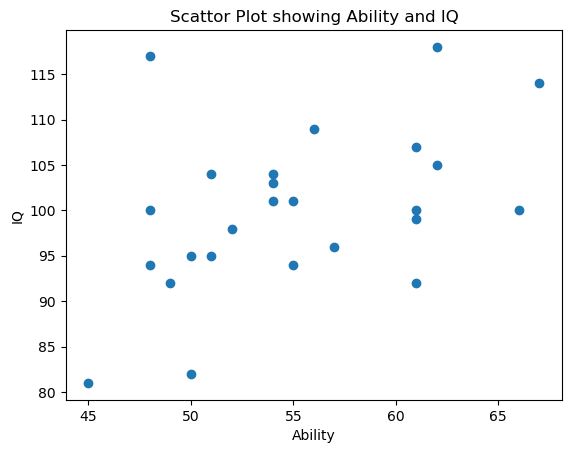

In [7]:
# Q1d (code):
# Scatter plot

# Assigns the variable to a value
# While "plt.scatter(df_mh['Abil'], df_mh['IQ'])" works, this is more practical
ability = df_mh['Abil']
iq = df_mh['IQ']

plt.scatter(x=ability, y=iq) # Creates scatter plot using pyplot
#'Ability' on the X axis and "IQ" on the Y axis
plt.xlabel('Ability') # Names the X axis
plt.ylabel('IQ') # Names the Y axis
plt.title('Scattor Plot showing Ability and IQ') # Adds title
plt.show()

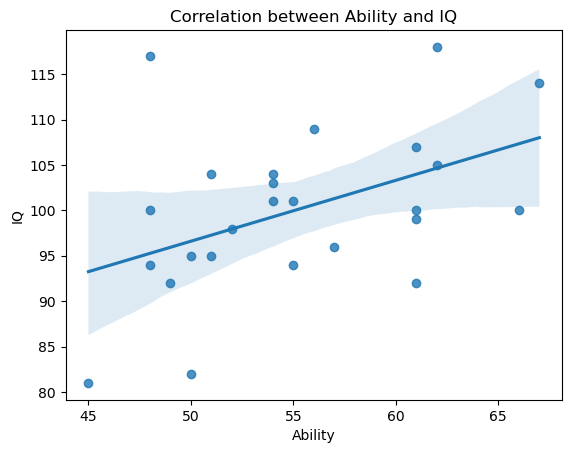

In [8]:
# Q1e (code):
# Correlation line
sns.regplot(x=ability, y=iq) # Creates correlation line using seaborn
#'Ability' on the X axis and "IQ" on the Y axis
plt.xlabel('Ability') # Names the X axis
plt.ylabel('IQ') # Names the Y axis
plt.title('Correlation between Ability and IQ') # Adds title
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian *(sic)* why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles *(sic)*)

*# Q2a (answer with words):*

Generally, Pearson is used for linear relationships between variables, while Spearman is used for monotonic relationships. In other words, for Pearson we assume that variables are normally distributed and have linear relationship, while with Spearman we assume that the variables vary in such a way that the correlation never decreases/increases. However, despite the scattered points seemingly not having much relevance to each other in my opinion, the correlation line *is* showing a slight increase. (Although it should be noted that the secondary / background line is quite large as well, showing a lot of ambiguity.) Therefore, Pearson would seem to be the preferred option to use.

In [11]:
# Q2b (code):
corr_mh = pg.corr(ability, iq, method='pearson') # Uses Pearson's test
print(corr_mh)

corr_mh = pg.corr(ability, iq, method='spearman') # Uses Spearman's test
print(corr_mh)

          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299
           n         r         CI95%     p-val     power
spearman  25  0.441479  [0.06, 0.71]  0.027154  0.618505


*Q2c (answer with words):*

Generally speaking,  0.4−0.59 is considered to be a moderate correlation. As mentioned previously, I had a hard time seeing the initial correlation based solely on the scatter plot; however, both the correlation line and the correlation coefficient test do show there there might be a correlation between Ability and IQ. To give a semi-conclusion to this minor question, I would simply suggest a more elaborate study which collects the data of more than 25 participants, as the current scope the the data makes it difficult to draw any concrete conclusions.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

_# Q3a (answer in words):_

_H0:_ There is no relationship between the amount of time spent reading at home per week (Home) and high reading ability (Reading Ability above the rounded average).

_H1:_ People who spent more time frequently reading at home (Reading Ability above the rounded average) also have a high reading ability (Reading Ability above the rounded average).

In [15]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data wrangling
from scipy.stats import chi2_contingency ##used for the Chi-square

# Define the rounded average for Reading Ability and Home
rank_abil = df_mh['Abil'].mean() # Calculates average
rank_home = df_mh['Home'].mean() # Calculates average
print(rank_abil)
print(rank_home)

# Create the Rank_Abil column
## Creates function to enter the info in the column
def rank_ability(df):
    if df > rank_abil:
        return  1 #If the participant's Ability is above average, return "1" in the column
    else:
        return  0 #If the participant's Ability is below average, return "0" in the column

df_mh['Rank_Abil'] = df_mh['Abil'].apply(rank_ability) # Applies function to Rank_Abil column

# Create the Rank_Home column
## Creates function to enter the info in the column
def rank_at_home(df):
    if df > rank_home:
        return  1 #If the participant's Reading At Home is above average, return "1" in the column
    else:
        return  0 #If the participant's Reading At Home is below average, return "0" in the column

df_mh['Rank_Home'] = df_mh['Home'].apply(rank_at_home) # Applies function to Rank_Home column

df_mh # Prints dataframe

55.12
124.0


,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,1,1
1,2,56,109,123,608,1,0
2,3,45,81,108,640,0,0
3,4,66,100,155,493,1,1
4,5,49,92,103,636,0,0
5,6,62,105,161,407,1,1
6,7,61,92,138,463,1,1
7,8,55,101,119,717,0,0
8,9,62,118,155,643,1,1
9,10,61,99,121,674,1,0


In [16]:
# Q3c (code):
# Construct Contingency Matrix

## Import numpy
import numpy as np ##used for the Contingency Matrix

data4contingency = []
data4contingency.append(len(df_mh['Abil']))
data4contingency.append(len(df_mh['Home']))
data4contingency.append(len(df_mh['Rank_Abil']))
data4contingency.append(len(df_mh['Rank_Home']))

print('The values:')
print(data4contingency)

# We transform the list in a contingency matrix
data_cm = np.array(data4contingency).reshape(2,-1)

print('The contingency matrix')
print(data_cm)

# Code taken from the Week 1 exercises
## Although I do feel like something went wrong here based on the output

The values:
[25, 25, 25, 25]
The contingency matrix
[[25 25]
 [25 25]]


In [17]:
# Q3d (code):
# Perform the Chi-square test

chi2, p_value, degree_of_ability, expected_frequencies = chi2_contingency(data_cm)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

# Code taken from the Week 1 exercises
# Although I do feel like something went wrong here based on the output

0.0 1.0
These are the expected frequencies
[[25. 25.]
 [25. 25.]]
The observed differences are not statiscally significant - H1 is rejected


_# Q3e (answer in words):_

This question asks to '[i]nterpret the results of the Chi-square test'; however, I can't confidently say I can do that as this point in time. As I mentioned in the previous two coding blocks, I tried to use the code provided by the Week 1 exercises to provide this assignment with both a Contingency Matrix and a Chi-square test. However, because the output of the Contingency Matrix was a 25 for all four of the given columns, there isn't much which can be said about the output. Which also makes me convinced I did something wrong in the code.

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

### Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [21]:
import pandas as pd # used for data wrangling
from scipy import stats # used for statistics
import numpy as np # used for data wrangling
import matplotlib.pyplot as plt # used for visualization
import seaborn as sns # used for visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()

,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [22]:
# Q4a (code):
# Calculate mean and standard deviation for age

ages = df_evaluators['age']

avg_age = np.mean(ages) # average for age
dev_age = np.std(ages) # standard deviation for age

print(avg_age)
print(dev_age)

30.852941176470587
6.145932911241463


In [23]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

sexes = df_evaluators['sex']

female_count = (sexes == 2).sum() # Uses .sum to count the amount of 2s / female evaluators
male_count = (sexes == 1).sum() # Uses .sum to count the amount of 1s / male evaluators

print(female_count)
print(male_count)

30
4


### Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [25]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()

,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [26]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
int_mean = df_ratings.groupby('eval_id')['Rating'].mean()
intellect_mean = int_mean.reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])
## .concat concatenates pandas objects along a particular axis
### Code taken from Pandas documentation
#### https://pandas.pydata.org/docs/reference/api/pandas.concat.html

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.join(df_evaluators.set_index('eval_id'), on='eval_id', how='left')
## .join joins the DataFrames together
## .set_index assigns a new index to the DataFrame
### Code taken from Pandas documentation
#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Rating', 'Category', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Rating,Category,condition
4,1,6.000000,hire,listened
3,1,7.000000,impression,listened
0,1,6.200000,intellect,listened
9,2,4.000000,hire,listened
8,2,4.666667,impression,listened


### Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian _(sic)_ why.

c. What are the independent variable and the dependent variable here?



_# **Q6a** (answer in words):_

_# Null hypothesis:_

There is no significant difference between the ratings given by evaluators who listened to the pitches and those who read the pitches.

_# Alternative hypothesis:_

There is a significant difference between the ratings given by evaluators who listened to the pitches and those who read the pitches.

_# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2)._

_# **Q6b** (answer in words):_

_# Which t-test should we choose, one-tail or two-tail? Explian_ (sic) _why._

One-tailed means that "the alternative hypothesis is directional", while two-tailed means that "the alternative hypothesis is non-directional" (Week 3 slides). In other words, a one-tailed test is looking whether there is either a "decrease" or an "increase", while the two-tailed test simply looks whether there is a change regardless of "increase" of "decrease".

In this case, I would suggest using a two-tailed test, as for the current hypothesis we're not asking if the score of evaluators who read the pitches, for example, is higher than those who listened to them. Currently, we're simply looking if there is a significant difference, regardless of increase or decrease.

_# **Q6c** (answer in words):_

_# What are the independent variable and the dependent variable here?_

An independent variable (IV) is a "measure of strictness of immigration policy (predictor, estimator)", and a dependent variable (DV) is a "diversity in population (target, outcome, estimand)" (Week 3 slides). In other words, we expect that the independent variables influence the dependent variables.

In this case, I would assume that the independent variable is "condition", while "Rating" is the dependent variable.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian _(sic)_ why we use these tests and how we made our decisions based on the test result.

In [32]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for T-tests

# Descriptive analysis of the ratings
ratings_desc = ratings2['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = stats.shapiro(ratings_desc)
## Code taken from Week 3 exercises

# Test for homogeneity of variances (Levene's test)
levene_results, p_levene = stats.levene(ratings2['Rating'], ratings2['Rating'])
if p_levene < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")
## Code taken from Week 3 exercises

# Independent t-tests
ttest_results, p_levene = stats.ttest_ind(ratings2['Rating'], ratings2['Rating'])
if p_levene < 0.05:
    print("Difference is statistically significant")
else:
    print("Difference is NOT statistically significant")
## Code taken from Week 3 exercises

ratings_desc, shapiro_results, levene_results, ttest_results

Levene's test is not significant - proceed
Difference is NOT statistically significant


(count    117.000000
 mean       4.529915
 std        2.235620
 min        0.000000
 25%        3.000000
 50%        4.666667
 75%        6.266667
 max        8.733333
 Name: Rating, dtype: float64,
 ShapiroResult(statistic=0.4822254776954651, pvalue=6.304434919002233e-06),
 0.0,
 0.0)

_#Q7b (answer in words):_

We use the Shapiro-Wilk test, Levene's test, and independent t-tests to test for normality. 

In the case of the Shapiro-Wilk test, the test "rejects the hypothesis of normality when the _p_-value is less than or equal to 0.05 [...] If the result is not significant, then we area step closer to reliably apply a parametric t-test" (Week 3 slides). In this particular case, the _p_ value is 6.3, which means that the _p_ value is well above 0.05; thus, the test passed and we're moving on to Levene's test.

We apply Levene's test when "the variances between the two groups are equal (homogeneity of variances)": "If the result is not significant, then we can reliably apply t-test. If the result is significant, then we need to apply a (non-)parametric test, e.g., Welch's t-test, or Wilcox-Mann Thomson" (Week 3 slides). Similar to the Shapiro-Wilk test, the test is **not** significant when the _p_ value is above 0.05. Again, it seems to be above 0.05, and we can therefore move on to an independent t-test.

The independent t-test assumes there is a "normal distribution of the variables" and that "the variances between the two groups are equal (homogeneity of variances)" (Week 3 slides). We use it to verify the previous results given to us by the Shapiro-Wilk test and Levene's test.

Although, it should be noted that I am unsure of whether I picked the correct secondary value when it came to the last two tests: (ratings2['Rating'], **ratings2['Rating']**). Therefore, another look at the code and the results is recommended in order to be sure of the answer.